Model: "Basic3dCNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 157, 157, 6, 3)]  0         
_________________________________________________________________
conv3d (Conv3D)              (None, 157, 157, 6, 64)   5248      
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 78, 78, 3, 64)     0         
_________________________________________________________________
batch_normalization (BatchNo (None, 78, 78, 3, 64)     256       
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 78, 78, 3, 128)    221312    
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 39, 39, 1, 128)    0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 39, 39, 1, 128)    5

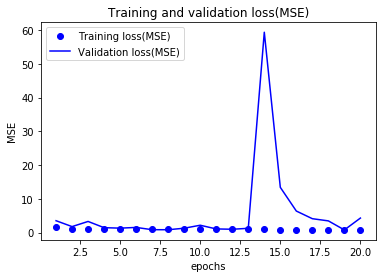

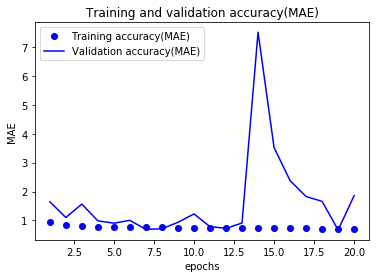

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

airports = ['VABB', 'VOTV', 'VOBL', 'VECC', 'VIDP']

def get_windspeed(code):
    arr = np.load("visibility_arr.npy")
    idx = airports.index(code)
    return arr[:, idx]#.astype("float32")

def get_era_full(param, level):
    arr = np.load("18To20{}{}_uint8.npy".format(param, level))
    #arr = np.load("21To22{}{}_uint8final.npy".format(param, level))
    return arr/256

# Import data
params = ["z", "z", "z"]
levels = [500, 700, 1000]

in1_var = get_era_full(params[0], levels[0])
in2_var = get_era_full(params[1], levels[1])
in3_var = get_era_full(params[2], levels[2])

x = np.concatenate((np.expand_dims(in1_var, axis=3), np.expand_dims(in2_var, axis=3), np.expand_dims(in3_var, axis=3)), axis=3)
y = get_windspeed('VOBL').reshape(-1, 1)

X = np.zeros((26275, 157, 157, 6, 3))
for i in range(26275):
    X[i,:,:,:,:] = np.rollaxis(x[i:i+6, :, :, :],0,3)
    
#Y = get_windspeed('VOBL')[5:].reshape(-1, 1)
Y = y[5:]

# splitting the data
train_features, train_labels = X[:18392], Y[:18392]
val_features, val_labels = (X[18392:22333], Y[18392:22333])
test_features, test_labels = (X[22333:], Y[22333:])

#to clear space for gpu, if occupied by any process
import tensorflow as tf
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.compat.v1.Session(config=config)

#initializer = tf.keras.initializers.HeUniform()
from tensorflow.keras import layers
inputs = keras.Input(shape=(157, 157, 6, 3))
x = layers.Conv3D(filters=64, kernel_size=(3,3,3), padding='same', activation="relu")(inputs)
x = layers.MaxPooling3D(pool_size=(2,2,2), strides=(2, 2, 2))(x)
x = layers.BatchNormalization()(x)

x = layers.Conv3D(filters=128, kernel_size=(3,3,3), padding='same', activation="relu")(x)
x = layers.MaxPooling3D(pool_size=(2,2,2), strides=(2, 2, 2))(x)
x = layers.BatchNormalization()(x)

x = layers.GlobalAveragePooling3D()(x)
x = layers.Dropout(0.4)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs, name="Basic3dCNN")

print(model.summary())

opt =tf.keras.optimizers.RMSprop(learning_rate=0.002)
model.compile(loss= "mse", optimizer = opt, metrics = [tf.keras.losses.MeanAbsoluteError()])
callbacks = [keras.callbacks.ModelCheckpoint(filepath = "vVOBL_3D.keras",
                                         save_best_only = True, monitor = "val_loss")]
history = model.fit(train_features, train_labels, batch_size = 8, epochs=20, verbose=2, validation_data = (val_features, val_labels), callbacks = callbacks, use_multiprocessing=True)

import matplotlib.pyplot as plt
%matplotlib inline
f1 = plt.figure();
mae = history.history["mean_absolute_error"]
loss = history.history["loss"]
val_mae = history.history["val_mean_absolute_error"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, "bo", label = "Training loss(MSE)");
plt.plot(epochs, val_loss, "b", label = "Validation loss(MSE)");
plt.title("Training and validation loss(MSE)");
plt.xlabel("epochs")
plt.ylabel("MSE")
plt.legend();

f2 = plt.figure();
plt.plot(epochs, mae, "bo", label = "Training accuracy(MAE)");
plt.plot(epochs, val_mae, "b", label = "Validation accuracy(MAE)");
plt.title("Training and validation accuracy(MAE)");
plt.legend();
plt.xlabel("epochs")
plt.ylabel("MAE")
plt.show();

f1.savefig(f"vVOBL_3D1.jpg", bbox_inches='tight', dpi=600);
f2.savefig(f"vVOBL_3D2.jpg", bbox_inches='tight', dpi=600);

In [2]:
1.6+1.1+1.5+0.9+0.9+1+0.69+0.71+0.93+1.22+0.78+0.72+0.91+7.5+3.5+2.37+1.82+1.66+0.67+1.86, 32.34/20

(32.34, 1.6170000000000002)

Model: "Basic3dCNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 157, 157, 6, 3)]  0         
_________________________________________________________________
conv3d (Conv3D)              (None, 157, 157, 6, 64)   5248      
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 78, 78, 3, 64)     0         
_________________________________________________________________
batch_normalization (BatchNo (None, 78, 78, 3, 64)     256       
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 78, 78, 3, 128)    221312    
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 39, 39, 1, 128)    0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 39, 39, 1, 128)    5

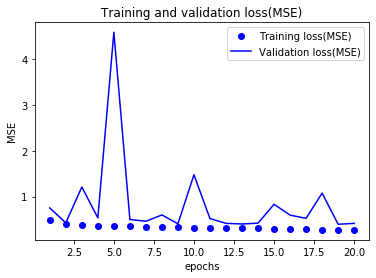

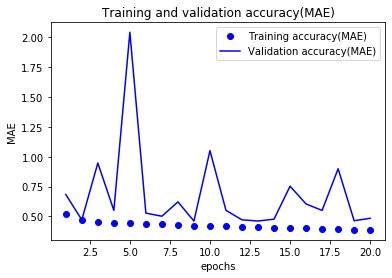

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

airports = ['VABB', 'VOTV', 'VOBL', 'VECC', 'VIDP']

def get_windspeed(code):
    arr = np.load("visibility_arr.npy")
    idx = airports.index(code)
    return arr[:, idx]#.astype("float32")

def get_era_full(param, level):
    arr = np.load("18To20{}{}_uint8.npy".format(param, level))
    #arr = np.load("21To22{}{}_uint8final.npy".format(param, level))
    return arr/256

# Import data
params = ["z", "z", "z"]
levels = [500, 700, 1000]

in1_var = get_era_full(params[0], levels[0])
in2_var = get_era_full(params[1], levels[1])
in3_var = get_era_full(params[2], levels[2])

x = np.concatenate((np.expand_dims(in1_var, axis=3), np.expand_dims(in2_var, axis=3), np.expand_dims(in3_var, axis=3)), axis=3)
y = get_windspeed('VABB').reshape(-1, 1)

X = np.zeros((26275, 157, 157, 6, 3))
for i in range(26275):
    X[i,:,:,:,:] = np.rollaxis(x[i:i+6, :, :, :],0,3)
    
#Y = get_windspeed('VOBL')[5:].reshape(-1, 1)
Y = y[5:]

# splitting the data
train_features, train_labels = X[:18392], Y[:18392]
val_features, val_labels = (X[18392:22333], Y[18392:22333])
test_features, test_labels = (X[22333:], Y[22333:])

#to clear space for gpu, if occupied by any process
import tensorflow as tf
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.compat.v1.Session(config=config)

#initializer = tf.keras.initializers.HeUniform()
from tensorflow.keras import layers
inputs = keras.Input(shape=(157, 157, 6, 3))
x = layers.Conv3D(filters=64, kernel_size=(3,3,3), padding='same', activation="relu")(inputs)
x = layers.MaxPooling3D(pool_size=(2,2,2), strides=(2, 2, 2))(x)
x = layers.BatchNormalization()(x)

x = layers.Conv3D(filters=128, kernel_size=(3,3,3), padding='same', activation="relu")(x)
x = layers.MaxPooling3D(pool_size=(2,2,2), strides=(2, 2, 2))(x)
x = layers.BatchNormalization()(x)

x = layers.GlobalAveragePooling3D()(x)
x = layers.Dropout(0.4)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs, name="Basic3dCNN")

print(model.summary())

opt =tf.keras.optimizers.RMSprop(learning_rate=0.002)
model.compile(loss= "mse", optimizer = opt, metrics = [tf.keras.losses.MeanAbsoluteError()])
callbacks = [keras.callbacks.ModelCheckpoint(filepath = "vVABB_3D.keras",
                                         save_best_only = True, monitor = "val_loss")]
history = model.fit(train_features, train_labels, batch_size = 8, epochs=20, verbose=2, validation_data = (val_features, val_labels), callbacks = callbacks, use_multiprocessing=True)

import matplotlib.pyplot as plt
%matplotlib inline
f1 = plt.figure();
mae = history.history["mean_absolute_error"]
loss = history.history["loss"]
val_mae = history.history["val_mean_absolute_error"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, "bo", label = "Training loss(MSE)");
plt.plot(epochs, val_loss, "b", label = "Validation loss(MSE)");
plt.title("Training and validation loss(MSE)");
plt.xlabel("epochs")
plt.ylabel("MSE")
plt.legend();

f2 = plt.figure();
plt.plot(epochs, mae, "bo", label = "Training accuracy(MAE)");
plt.plot(epochs, val_mae, "b", label = "Validation accuracy(MAE)");
plt.title("Training and validation accuracy(MAE)");
plt.legend();
plt.xlabel("epochs")
plt.ylabel("MAE")
plt.show();

f1.savefig(f"vVABB_3D1.jpg", bbox_inches='tight', dpi=600);
f2.savefig(f"vVABB_3D2.jpg", bbox_inches='tight', dpi=600);

In [4]:
0.68+0.47+0.94+0.54+2.04+0.52+0.5+0.62+0.46+1.05+0.55+0.47+0.46+0.47+0.75+0.60+0.54+0.89+0.46+0.48, 13.49/20

(13.490000000000002, 0.6745)

Model: "Basic3dCNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 157, 157, 6, 3)]  0         
_________________________________________________________________
conv3d (Conv3D)              (None, 157, 157, 6, 64)   5248      
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 78, 78, 3, 64)     0         
_________________________________________________________________
batch_normalization (BatchNo (None, 78, 78, 3, 64)     256       
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 78, 78, 3, 128)    221312    
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 39, 39, 1, 128)    0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 39, 39, 1, 128)    5

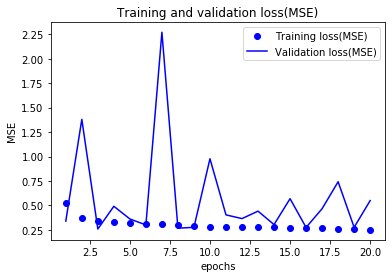

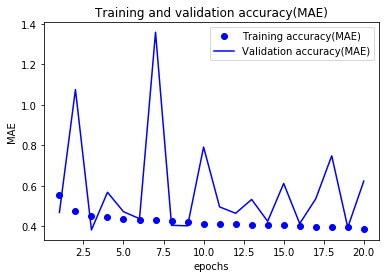

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

airports = ['VABB', 'VOTV', 'VOBL', 'VECC', 'VIDP']

def get_windspeed(code):
    arr = np.load("visibility_arr.npy")
    idx = airports.index(code)
    return arr[:, idx].astype("float32")

def get_era_full(param, level):
    arr = np.load("18To20{}{}_uint8.npy".format(param, level))
    return arr/256

# Import data
params = ["z", "z", "z"]
levels = [500, 700, 1000]

in1_var = get_era_full(params[0], levels[0])
in2_var = get_era_full(params[1], levels[1])
in3_var = get_era_full(params[2], levels[2])

x = np.concatenate((np.expand_dims(in1_var, axis=3), np.expand_dims(in2_var, axis=3), np.expand_dims(in3_var, axis=3)), axis=3)
y = get_windspeed('VOTV').reshape(-1, 1)

X = np.zeros((26275, 157, 157, 6, 3))
for i in range(26275):
    X[i,:,:,:,:] = np.rollaxis(x[i:i+6, :, :, :],0,3)
    
#Y = get_windspeed('VOBL')[5:].reshape(-1, 1)
Y = y[5:]

# splitting the data
train_features, train_labels = X[:18392], Y[:18392]
val_features, val_labels = (X[18392:22333], Y[18392:22333])
test_features, test_labels = (X[22333:], Y[22333:])

#to clear space for gpu, if occupied by any process
import tensorflow as tf
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.compat.v1.Session(config=config)

#initializer = tf.keras.initializers.HeUniform()
from tensorflow.keras import layers
inputs = keras.Input(shape=(157, 157, 6, 3))
x = layers.Conv3D(filters=64, kernel_size=(3,3,3), padding='same', activation="relu")(inputs)
x = layers.MaxPooling3D(pool_size=(2,2,2), strides=(2, 2, 2))(x)
x = layers.BatchNormalization()(x)

x = layers.Conv3D(filters=128, kernel_size=(3,3,3), padding='same', activation="relu")(x)
x = layers.MaxPooling3D(pool_size=(2,2,2), strides=(2, 2, 2))(x)
x = layers.BatchNormalization()(x)

x = layers.GlobalAveragePooling3D()(x)
x = layers.Dropout(0.4)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs, name="Basic3dCNN")

print(model.summary())

opt =tf.keras.optimizers.RMSprop(learning_rate=0.002)
model.compile(loss= "mse", optimizer = opt, metrics = [tf.keras.losses.MeanAbsoluteError()])
callbacks = [keras.callbacks.ModelCheckpoint(filepath = "vVOTV_3D.keras",
                                         save_best_only = True, monitor = "val_loss")]
history = model.fit(train_features, train_labels, batch_size = 8, epochs=20, verbose=2, validation_data = (val_features, val_labels), callbacks = callbacks, use_multiprocessing=True)

import matplotlib.pyplot as plt
%matplotlib inline
f1 = plt.figure();
mae = history.history["mean_absolute_error"]
loss = history.history["loss"]
val_mae = history.history["val_mean_absolute_error"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, "bo", label = "Training loss(MSE)");
plt.plot(epochs, val_loss, "b", label = "Validation loss(MSE)");
plt.title("Training and validation loss(MSE)");
plt.xlabel("epochs")
plt.ylabel("MSE")
plt.legend();

f2 = plt.figure();
plt.plot(epochs, mae, "bo", label = "Training accuracy(MAE)");
plt.plot(epochs, val_mae, "b", label = "Validation accuracy(MAE)");
plt.title("Training and validation accuracy(MAE)");
plt.legend();
plt.xlabel("epochs")
plt.ylabel("MAE")
plt.show();

f1.savefig(f"vVOTV_3D1.jpg", bbox_inches='tight', dpi=600);
f2.savefig(f"vVOTV_3D2.jpg", bbox_inches='tight', dpi=600);

In [6]:
0.46+1.07+0.3+0.5+0.47+0.43+1.35+0.4+0.4+0.79+0.49+0.46+0.53+0.42+0.61+0.41+0.53+0.74+0.39+0.62, 11.37/20

(11.370000000000001, 0.5685)

Model: "Basic3dCNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 157, 157, 6, 3)]  0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 157, 157, 6, 64)   5248      
_________________________________________________________________
max_pooling3d_2 (MaxPooling3 (None, 78, 78, 3, 64)     0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 78, 78, 3, 64)     256       
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 78, 78, 3, 128)    221312    
_________________________________________________________________
max_pooling3d_3 (MaxPooling3 (None, 39, 39, 1, 128)    0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 39, 39, 1, 128)    5

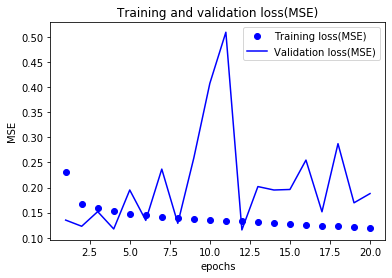

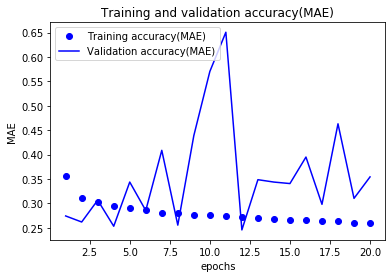

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

airports = ['VABB', 'VOTV', 'VOBL', 'VECC', 'VIDP']

def get_windspeed(code):
    arr = np.load("visibility_arr.npy")
    idx = airports.index(code)
    return arr[:, idx]#.astype("float32")

def get_era_full(param, level):
    arr = np.load("18To20{}{}_uint8.npy".format(param, level))
    #arr = np.load("21To22{}{}_uint8final.npy".format(param, level))
    return arr/256

# Import data
params = ["z", "z", "z"]
levels = [500, 700, 1000]

in1_var = get_era_full(params[0], levels[0])
in2_var = get_era_full(params[1], levels[1])
in3_var = get_era_full(params[2], levels[2])

x = np.concatenate((np.expand_dims(in1_var, axis=3), np.expand_dims(in2_var, axis=3), np.expand_dims(in3_var, axis=3)), axis=3)
y = get_windspeed('VECC').reshape(-1, 1)

X = np.zeros((26275, 157, 157, 6, 3))
for i in range(26275):
    X[i,:,:,:,:] = np.rollaxis(x[i:i+6, :, :, :],0,3)
    
#Y = get_windspeed('VOBL')[5:].reshape(-1, 1)
Y = y[5:]

# splitting the data
train_features, train_labels = X[:18392], Y[:18392]
val_features, val_labels = (X[18392:22333], Y[18392:22333])
test_features, test_labels = (X[22333:], Y[22333:])

#to clear space for gpu, if occupied by any process
import tensorflow as tf
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.compat.v1.Session(config=config)

#initializer = tf.keras.initializers.HeUniform()
from tensorflow.keras import layers
inputs = keras.Input(shape=(157, 157, 6, 3))
x = layers.Conv3D(filters=64, kernel_size=(3,3,3), padding='same', activation="relu")(inputs)
x = layers.MaxPooling3D(pool_size=(2,2,2), strides=(2, 2, 2))(x)
x = layers.BatchNormalization()(x)

x = layers.Conv3D(filters=128, kernel_size=(3,3,3), padding='same', activation="relu")(x)
x = layers.MaxPooling3D(pool_size=(2,2,2), strides=(2, 2, 2))(x)
x = layers.BatchNormalization()(x)

x = layers.GlobalAveragePooling3D()(x)
x = layers.Dropout(0.4)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs, name="Basic3dCNN")

print(model.summary())

opt =tf.keras.optimizers.RMSprop(learning_rate=0.002)
model.compile(loss= "mse", optimizer = opt, metrics = [tf.keras.losses.MeanAbsoluteError()])
callbacks = [keras.callbacks.ModelCheckpoint(filepath = "vVECC_3D.keras",
                                         save_best_only = True, monitor = "val_loss")]
history = model.fit(train_features, train_labels, batch_size = 8, epochs=20, verbose=2, validation_data = (val_features, val_labels), callbacks = callbacks, use_multiprocessing=True)

import matplotlib.pyplot as plt
%matplotlib inline
f1 = plt.figure();
mae = history.history["mean_absolute_error"]
loss = history.history["loss"]
val_mae = history.history["val_mean_absolute_error"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, "bo", label = "Training loss(MSE)");
plt.plot(epochs, val_loss, "b", label = "Validation loss(MSE)");
plt.title("Training and validation loss(MSE)");
plt.xlabel("epochs")
plt.ylabel("MSE")
plt.legend();

f2 = plt.figure();
plt.plot(epochs, mae, "bo", label = "Training accuracy(MAE)");
plt.plot(epochs, val_mae, "b", label = "Validation accuracy(MAE)");
plt.title("Training and validation accuracy(MAE)");
plt.legend();
plt.xlabel("epochs")
plt.ylabel("MAE")
plt.show();

f1.savefig(f"vVECC_3D1.jpg", bbox_inches='tight', dpi=600);
f2.savefig(f"vVECC_3D2.jpg", bbox_inches='tight', dpi=600);

In [8]:
0.27+0.26+0.3+0.25+0.34+0.28+0.40+0.25+0.43+0.57+0.65+0.24+0.34+0.34+0.34+0.39+0.29+0.46+0.31+0.35, 7.05/20

(7.059999999999999, 0.3525)

Model: "Basic3dCNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 157, 157, 6, 3)]  0         
_________________________________________________________________
conv3d_4 (Conv3D)            (None, 157, 157, 6, 64)   5248      
_________________________________________________________________
max_pooling3d_4 (MaxPooling3 (None, 78, 78, 3, 64)     0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 78, 78, 3, 64)     256       
_________________________________________________________________
conv3d_5 (Conv3D)            (None, 78, 78, 3, 128)    221312    
_________________________________________________________________
max_pooling3d_5 (MaxPooling3 (None, 39, 39, 1, 128)    0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 39, 39, 1, 128)    5

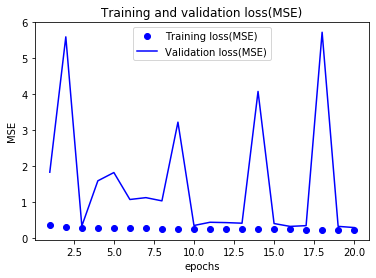

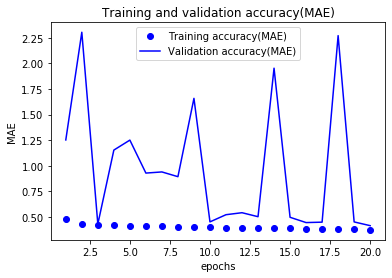

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

airports = ['VABB', 'VOTV', 'VOBL', 'VECC', 'VIDP']

def get_windspeed(code):
    arr = np.load("visibility_arr.npy")
    idx = airports.index(code)
    return arr[:, idx]#.astype("float32")

def get_era_full(param, level):
    arr = np.load("18To20{}{}_uint8.npy".format(param, level))
    #arr = np.load("21To22{}{}_uint8final.npy".format(param, level))
    return arr/256

# Import data
params = ["z", "z", "z"]
levels = [500, 700, 1000]

in1_var = get_era_full(params[0], levels[0])
in2_var = get_era_full(params[1], levels[1])
in3_var = get_era_full(params[2], levels[2])

x = np.concatenate((np.expand_dims(in1_var, axis=3), np.expand_dims(in2_var, axis=3), np.expand_dims(in3_var, axis=3)), axis=3)
y = get_windspeed('VIDP').reshape(-1, 1)

X = np.zeros((26275, 157, 157, 6, 3))
for i in range(26275):
    X[i,:,:,:,:] = np.rollaxis(x[i:i+6, :, :, :],0,3)
    
#Y = get_windspeed('VOBL')[5:].reshape(-1, 1)
Y = y[5:]

# splitting the data
train_features, train_labels = X[:18392], Y[:18392]
val_features, val_labels = (X[18392:22333], Y[18392:22333])
test_features, test_labels = (X[22333:], Y[22333:])

#to clear space for gpu, if occupied by any process
import tensorflow as tf
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.compat.v1.Session(config=config)

#initializer = tf.keras.initializers.HeUniform()
from tensorflow.keras import layers
inputs = keras.Input(shape=(157, 157, 6, 3))
x = layers.Conv3D(filters=64, kernel_size=(3,3,3), padding='same', activation="relu")(inputs)
x = layers.MaxPooling3D(pool_size=(2,2,2), strides=(2, 2, 2))(x)
x = layers.BatchNormalization()(x)

x = layers.Conv3D(filters=128, kernel_size=(3,3,3), padding='same', activation="relu")(x)
x = layers.MaxPooling3D(pool_size=(2,2,2), strides=(2, 2, 2))(x)
x = layers.BatchNormalization()(x)

x = layers.GlobalAveragePooling3D()(x)
x = layers.Dropout(0.4)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs, name="Basic3dCNN")

print(model.summary())

opt =tf.keras.optimizers.RMSprop(learning_rate=0.002)
model.compile(loss= "mse", optimizer = opt, metrics = [tf.keras.losses.MeanAbsoluteError()])
callbacks = [keras.callbacks.ModelCheckpoint(filepath = "vVIDP_3D.keras",
                                         save_best_only = True, monitor = "val_loss")]
history = model.fit(train_features, train_labels, batch_size = 8, epochs=20, verbose=2, validation_data = (val_features, val_labels), callbacks = callbacks, use_multiprocessing=True)

import matplotlib.pyplot as plt
%matplotlib inline
f1 = plt.figure();
mae = history.history["mean_absolute_error"]
loss = history.history["loss"]
val_mae = history.history["val_mean_absolute_error"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, "bo", label = "Training loss(MSE)");
plt.plot(epochs, val_loss, "b", label = "Validation loss(MSE)");
plt.title("Training and validation loss(MSE)");
plt.xlabel("epochs")
plt.ylabel("MSE")
plt.legend();

f2 = plt.figure();
plt.plot(epochs, mae, "bo", label = "Training accuracy(MAE)");
plt.plot(epochs, val_mae, "b", label = "Validation accuracy(MAE)");
plt.title("Training and validation accuracy(MAE)");
plt.legend();
plt.xlabel("epochs")
plt.ylabel("MAE")
plt.show();

f1.savefig(f"vVIDP_3D1.jpg", bbox_inches='tight', dpi=600);
f2.savefig(f"vVIDP_3D2.jpg", bbox_inches='tight', dpi=600);

In [10]:
1.25+2.3+0.43+1.15+1.25+0.9+0.94+0.89+1.65+0.45+0.52+0.54+0.50+1.95+0.49+0.44+0.44+2.27+0.45+0.41, 19.22/20

(19.22, 0.961)